<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/bidirectional_rnn_lstm_gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM,GRU,Bidirectional

In [2]:
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data()

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Get the word index dictionary (maps words to integers)
word_index = imdb.get_word_index()

# Vocabulary size = number of unique words + 1 (for padding)
vocab_size = len(word_index) + 1
print("Vocabulary size:", vocab_size)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Vocabulary size: 88585


In [7]:
# Define the LSTM model
model = Sequential([
    Embedding(30000, 50, input_length=200),
    Bidirectional(LSTM(5, return_sequences=True)),
    Bidirectional(LSTM(5, return_sequences=True)),
    Bidirectional(LSTM(5, return_sequences=True)),

    LSTM(5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6952 - loss: 0.5743 - val_accuracy: 0.8118 - val_loss: 0.4160
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8868 - loss: 0.3041 - val_accuracy: 0.8464 - val_loss: 0.3789
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9408 - loss: 0.1773 - val_accuracy: 0.8482 - val_loss: 0.3694
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9660 - loss: 0.1090 - val_accuracy: 0.8494 - val_loss: 0.4221
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9738 - loss: 0.0883 - val_accuracy: 0.8424 - val_loss: 0.4348


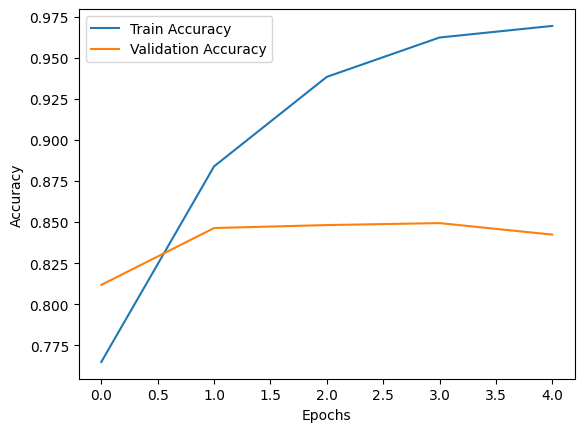

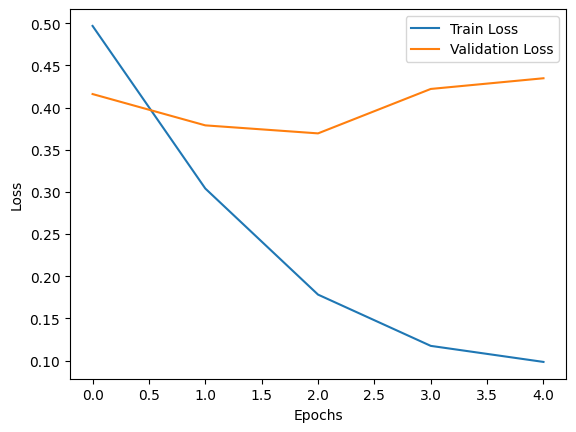

In [10]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()